# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

In [1]:
# Importing dependecies
import pandas as pd

In [2]:
# Loading accident dataset
accidents = pd.read_csv('Resources/accident_data.csv')
accidents.head()

,Unnamed: 0,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,0,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,04/02/2020,...,6,0,9,9,1,9,9,0,0,1
1,1,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,27/04/2020,...,6,0,0,4,1,1,1,0,0,1
2,2,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,01/01/2020,...,6,0,0,0,4,1,2,0,0,1
3,3,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,01/01/2020,...,6,0,0,4,4,1,1,0,0,1
4,4,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,01/01/2020,...,5,0,0,0,4,1,1,0,0,1


In [3]:
# Loading Lookup Dataset
# Lookup is a reference for codes and formats used in the accidents dataset
lookup = pd.read_csv('Resources/lookup_Data.csv')
lookup.head()

,Unnamed: 0,table,field name,code/format,label,note
0,0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,1,Accident,accident_year,NaN,NaN,NaN
2,2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,3,Accident,longitude,NaN,NaN,Null if not known
4,4,Accident,Latitude,NaN,NaN,Null if not known


## Preprocessing
We need to process our data so that it will:
* Show only records that are within the analysis scope (major incidents with 3+ casualties)
* are devoid of duplicates
* deal with missing information


In [4]:
# Filtering our data using number_of_casualties to focus on major incidents (3+ casualties)

major_accidents = accidents[accidents['number_of_casualties'] >= 3]

# dropping any duplicate records , if any
major_accidents.drop_duplicates(subset= 'accident_index' , keep = 'first')

,Unnamed: 0,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,date,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
11,11,2020010228024,2020,10228024,-0.058620,51.660013,2,3,4,01/01/2020,...,5,0,0,5,4,1,2,0,0,1
136,136,2020010228521,2020,10228521,-0.086520,51.616219,3,1,4,03/01/2020,...,3,406,0,9,4,1,1,0,0,1
173,173,2020010228625,2020,10228625,-0.190729,51.459756,3,3,3,05/01/2020,...,6,0,0,0,1,1,1,0,0,1
187,187,2020010228670,2020,10228670,0.185884,51.478366,3,2,3,05/01/2020,...,6,0,0,0,1,1,1,0,0,1
212,212,2020010228789,2020,10228789,-0.251891,51.553577,2,2,4,06/01/2020,...,6,0,0,0,4,1,1,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91141,91141,2020991011301,2020,991011301,-3.912823,55.793998,2,1,3,26/12/2020,...,6,0,0,0,4,2,2,0,0,1
91153,91153,2020991012275,2020,991012275,-3.725555,56.390843,3,1,3,08/08/2020,...,6,0,0,0,1,1,1,0,0,2
91167,91167,2020991012929,2020,991012929,-2.548388,56.631179,2,2,5,28/12/2020,...,6,0,0,0,6,1,4,0,0,2
91173,91173,2020991014080,2020,991014080,-2.411295,56.871085,2,2,3,02/08/2020,...,6,0,0,0,1,1,1,0,0,2


## Time Frequency of Incidents
We will investigate the most frequent time of day and day of the week that the accidents occur

In [5]:
# Determining the  number of incidents that occurred for each day of the week
accidents_by_day = major_accidents['day_of_week'].value_counts()
print(accidents_by_day)


7    820
6    798
1    687
5    645
4    632
3    621
2    614
Name: day_of_week, dtype: int64


We see that days of the week that have the highest casualty counts are [7,6 ,1] referring to Saturday , Friday , and Sunday Respectively.
Some intial ideas from this point in the analysis are:
* It could be that weekend activities sees an increase in car occupancy thus increasing casualty rate when one is involved in an incident
* Certain weekend activities might increase the odds of an accident such as drinking or driving tired
* Focusing on weekend incidents has the potential of reducing major incidents by 23%


In [6]:
import numpy as np
# Taking the average of the 3 days with the most accidents
most_avg = np.mean(accidents_by_day[0:3])

least_avg = np.mean(accidents_by_day[4:]) # average of days with the least accidents

print('Most' , most_avg , '/' , 'Least' , least_avg)

# Compute the % increase in accidents between weekdays and weekends
(768 - 622) / 622 * 100

# The weekend sees a 23% increase in major incidents compared to the weekend. Focusing on the weekend alone can cause a significant decrease in the number of major
# incidents
# Create a bar chart that has the weekdays as labels and plots the number of major incidents on the y axis

Most 768.3333333333334 / Least 622.3333333333334


23.47266881028939

## Time Analysis

<AxesSubplot:>

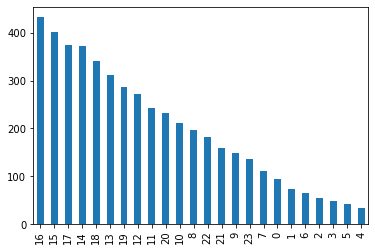

In [73]:
# Looking for trends in the time of day a major incident occurred
TOD = major_accidents['time'] # The column that pertains to incident time of day (TOD)

# Converting str into datetime
# And then stripping it down to the hour
import datetime
TOD = pd.to_datetime(TOD, format='%H:%M').dt.hour
x = TOD.value_counts()
x.plot.bar()

# Narrowing it down to the hours with more than 200 incidents






'23:59'